In [8]:
# Install necessary libraries and dependencies
%pip install numpy                
%pip install torch torchvision
%pip install jupyter
%pip install scikit-learn
%pip install seaborn matplotlib 
# !pip install numpy
# !pip install torch torchvision
# !pip install jupyter
# !pip install scikit-learn
# !pip install seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [9]:
# import the packages
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

# for reproducibility
torch.manual_seed(69)
np.random.seed(69)

import torch

print(f"Is CUDA supported by this system? {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")

# Storing ID of current CUDA device
cuda_id = torch.cuda.current_device()
print(f"ID of current CUDA device: {torch.cuda.current_device()}")
      
print(f"Name of current CUDA device: {torch.cuda.get_device_name(cuda_id)}")

# set up device for gpu
print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Running on device {device}")
device




Is CUDA supported by this system? True
CUDA version: 11.8
ID of current CUDA device: 0
Name of current CUDA device: NVIDIA GeForce RTX 3050
True
Running on device cuda


device(type='cuda')

In [10]:
# Load the data
import torchvision.transforms as transforms

# Define a transformation pipeline. We're converting images to a pytorch tensor
transform = transforms.Compose([transforms.ToTensor()])

# Now we load the fashion dataset 
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

# Create a data loader for the training set
# this will give me batches of data
# shuffle means its shuffled at the start of every epoch, num workers indicates the processes count used for loading
trainloader = torch.utils.data.DataLoader(trainset, 4, shuffle=True, num_workers=2)

# And load the test
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, 4, shuffle=False, num_workers=2)

# Define the class labels for the Fashion MNIST dataset.
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

Convolutional Neural Networks (CNNs)
Convolutional Neural Networks (CNNs) have revolutionized the field of computer vision. They are specifically designed to recognize visual patterns directly from pixel images with minimal preprocessing. CNNs are hierarchical models where neurons in one layer connect to neurons in the next layer in a limited fashion, somewhat like the receptive field in human vision.

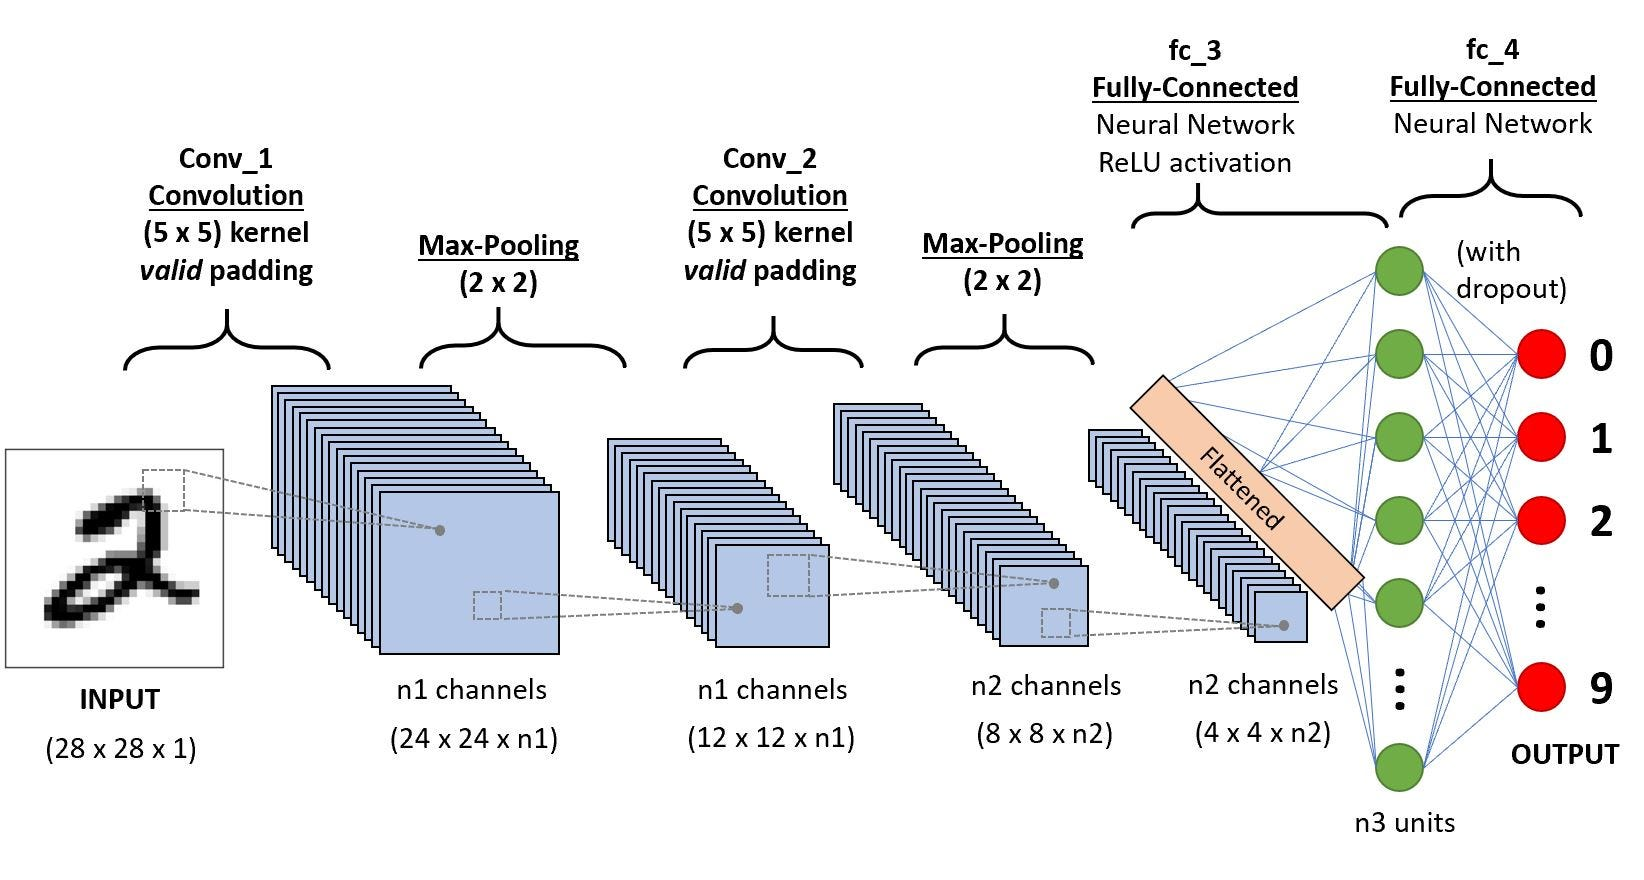

A typical CNN architecture consists of:

- Convolutional Layers: Apply convolution operation on the input layer to detect features.
- Activation Layers: Introduce non-linearity to the model (typically ReLU).
- Pooling Layers: Perform down-sampling operations to reduce dimensionality.
- Fully Connected Layers: After several convolutional and pooling layers, the high-level reasoning in the neural network happens via fully connected layers.

In [23]:
# testing for me

test_input = torch.rand(4,1,28,28)
# print(test_input)

test_fn = nn.Conv2d(1, 32, 3)
x = test_fn(test_input)

print(x.size())


torch.Size([4, 32, 26, 26])


In [16]:
# Defining the model 
import torch.nn as nn
import torch.nn.functional as F

class BasicCNN(nn.Module):
    def __init__(self):
        super(BasicCNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 32, 3)
        
        self.conv2 = nn.Conv2d(32, 64, 3)
        
        # 64 features * the 5x5 image resulting at the end of our 2nd maxpool
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        
        self.fc2 = nn.Linear(128, 10) # in prep for the final func, softmax
        
    def forward(self, x):
        # Input: [batchSize, 1, 28,28] - 1 channel (pixel or no pixel), 28x28 image
        x = F.relu(self.conv1(x))
        # shape is now [batchSize, 32, 26,26] - 32 channels learned and 26x26 image due to convolution
        x = F.max_pool2d(x, 2)
        # shape is now [batchSize, 32, 13,13] - size halved
        
        x = F.relu(self.conv2(x))
        # shape is now [batchSize, 64, 11,11] - conv2d with a kernel size of 3, so (3-1)=2, 2 pixel reduction
        x = F.max_pool2d(x, 2)
        # shape is now [batchSize, 64, 5,5] - size halved (rounds down)
        
        # same data but new shape
        x = x.view(-1, 64*5*5) # flattening x
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, 1)
        

In [18]:
# Now we can train and evaluate

model = BasicCNN().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=.001)
criterion = nn.CrossEntropyLoss()

In [19]:
# Number of complete passes through the dataset
num_epochs = 5

# Start the training loop
for epoch in range(num_epochs):
    # Set the model to training mode
    model.train()
    
    # Iterate over each batch of the training data
    for images, labels in trainloader:
        # Move the images and labels to the computational device (CPU or GPU)
        images, labels = images.to(device), labels.to(device)
        
        # Clear the gradients from the previous iteration
        optimizer.zero_grad()
        
        # Forward pass: Pass the images through the model to get the predicted outputs
        outputs = model(images)
        
        # Compute the loss between predicted and real values
        loss = criterion(outputs, labels)
        
        # Backwards pass to compute gradients w.r.t the models params (coefficients)
        loss.backward()
        
        # update those params
        optimizer.step()

In [ ]:
# Test it up
import numpy 